<h1 style="font-size:30px;"> Reconhecimento Visual de Tipos de Plástico</h1>

<h2> Classificação dos tipos de plástico</h2>

<h3>Origem dos dados:</h3>


Os dados estão integralmente disponíveis no Kaggle através <a href="https://www.kaggle.com/datasets/remnazkarart/plastic-classification-dataset">deste link</a>


## Índice
* [1 Carregue o conjunto de dados Plastic Classification](#1-Carregue-o-conjunto-de-dados-plastic-types)
* [2 Pré-processamento de conjuntos de dados](#2-Pré-processamento-de-conjuntos-de-dados)
* [3 Arquitetura do Modelo](#3-Arquitetura-do-Modelo)
* [4 Implementação do Modelo](#4-Implementação-do-Modelo)
* [5 Avaliação do Modelo](#5-Avaliação-do-Modelo)
* [6 Conclusão](#6-Conclusão)


# 0 INSTALAÇÃO E IMPORTAÇÃO DAS BIBLIOTECAS

## 0.1 Instalação das bibliotecas

In [1]:
#!pip install opendatasets
#!pip install pandas
#!pip install imagehash
#!pip install kagglehub

## 0.2 Importação das bibliotecas

In [2]:
import numpy as np
import pandas as pd
import zipfile
import os
import random
import kagglehub

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib
import seaborn as sns
from PIL import Image
import imagehash

In [4]:
import cv2
#from google.colab.patches import cv2_imshow


In [5]:
import tensorflow
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
tensorflow.__version__

'2.17.0'

In [6]:
import torch
from glob import glob
from pathlib import Path
import os
import shutil

In [7]:
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["image.cmap"] = "gray"

In [8]:
SEED_VALUE = 42

# Corrigir semente para tornar o treinamento determinístico.
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

# 1 EXPLORAÇÃO DO CONJUNTO DE DADOS

## 1.1 Ler o conjunto de dados 

In [16]:
# caminhos das pastas e subpastas
root_dir = '../data/Plastic_Classification/'
classes = os.listdir(root_dir)

In [17]:
classes

['test', 'train', 'validation']

In [20]:
base_test = '../data/Plastic_Classification/'
classes_test = os.listdir(base_test)
classes_test


['test', 'train', 'validation']

In [21]:
base_train = '../data/Plastic_Classification/train/'
classes_train = os.listdir(base_train)
classes_train

['HDPE', 'LDPA', 'Other', 'PET', 'PP', 'PS', 'PVC']

In [22]:
base_validation = '../data/Plastic_Classification/validation/'
classes_validation = os.listdir(base_validation)
classes_validation

['HDPE', 'LDPA', 'Other', 'PET', 'PP', 'PS', 'PVC']

In [23]:
# Exibe a lista de classes
print("Classes encontradas:", classes_validation)

# Conta quantas classes existem
print("Número total de classes:", len(classes_validation))

Classes encontradas: ['HDPE', 'LDPA', 'Other', 'PET', 'PP', 'PS', 'PVC']
Número total de classes: 7


## 1.2 Verificar algumas extensões das imagens

In [27]:
# verificar as extensoes das imagens
base_test = '../data/Plastic_Classification/train/PVC/'
# Lista de extensões únicas encontradas
extensoes = set()

# Itera pelos arquivos e coleta extensões
for arquivo in os.listdir(base_test):
    _, ext = os.path.splitext(arquivo)  # separa nome e extensão
    if ext:
        extensoes.add(ext.lower())

# Exibe as extensões encontradas
print("Extensões encontradas na pasta:")
for ext in sorted(extensoes):
    print(ext)

Extensões encontradas na pasta:
.avif
.jpeg
.jpg
.png
.webp


In [28]:
# verificar as extensoes das imagens
base_test = '../data/Plastic_Classification/validation/HDPE/'
# Lista de extensões únicas encontradas
extensoes = set()

# Itera pelos arquivos e coleta extensões
for arquivo in os.listdir(base_test):
    _, ext = os.path.splitext(arquivo)  # separa nome e extensão
    if ext:
        extensoes.add(ext.lower())

# Exibe as extensões encontradas
print("Extensões encontradas na pasta:")
for ext in sorted(extensoes):
    print(ext)

Extensões encontradas na pasta:
.jpeg
.jpg
.png
.webp


In [29]:
# verificar as extensoes das imagens
base_test = '../data/Plastic_Classification/train/PS'
# Lista de extensões únicas encontradas
extensoes = set()

# Itera pelos arquivos e coleta extensões
for arquivo in os.listdir(base_test):
    _, ext = os.path.splitext(arquivo)  # separa nome e extensão
    if ext:
        extensoes.add(ext.lower())

# Exibe as extensões encontradas
print("Extensões encontradas na pasta:")
for ext in sorted(extensoes):
    print(ext)

Extensões encontradas na pasta:
.jfif
.jpeg
.jpg
.png
.webp


## 1.3 Renomear as imagens mantendo suas extensões

### 1.3.1 Renomear as imagens da pasta test

In [31]:
# renomear os arquivos da pasta 

base_test = '../data/Plastic_Classification/test/HDPE/'
# Lista e ordena os arquivos da pasta
arquivos = sorted([f for f in os.listdir(base_test) if os.path.isfile(os.path.join(base_test, f))])

# Renomeia os arquivos com base no índice
for i, nome_antigo in enumerate(arquivos, start=1):
    # Extrai a extensão original
    _, extensao = os.path.splitext(nome_antigo)
    extensao = extensao.lower()

    # Define o novo nome, mantendo a extensão
    novo_nome = f'image_{i}{extensao}'

    # Caminhos completos
    caminho_antigo = os.path.join(base_test, nome_antigo)
    caminho_novo = os.path.join(base_test, novo_nome)

    # Renomeia
    os.rename(caminho_antigo, caminho_novo)

print("Arquivos renomeados com sucesso!")

Arquivos renomeados com sucesso!


In [32]:
# renomear os arquivos da pasta 

base_test = '../data/Plastic_Classification/test/LDPA/'
# Lista e ordena os arquivos da pasta
arquivos = sorted([f for f in os.listdir(base_test) if os.path.isfile(os.path.join(base_test, f))])

# Renomeia os arquivos com base no índice
for i, nome_antigo in enumerate(arquivos, start=1):
    # Extrai a extensão original
    _, extensao = os.path.splitext(nome_antigo)
    extensao = extensao.lower()

    # Define o novo nome, mantendo a extensão
    novo_nome = f'image_{i}{extensao}'

    # Caminhos completos
    caminho_antigo = os.path.join(base_test, nome_antigo)
    caminho_novo = os.path.join(base_test, novo_nome)

    # Renomeia
    os.rename(caminho_antigo, caminho_novo)

print("Arquivos renomeados com sucesso!")

Arquivos renomeados com sucesso!


In [33]:
# renomear os arquivos da pasta 
base_test = '../data/Plastic_Classification/test/Other/'
# Lista e ordena os arquivos da pasta
arquivos = sorted([f for f in os.listdir(base_test) if os.path.isfile(os.path.join(base_test, f))])

# Renomeia os arquivos com base no índice
for i, nome_antigo in enumerate(arquivos, start=1):
    # Extrai a extensão original
    _, extensao = os.path.splitext(nome_antigo)
    extensao = extensao.lower()

    # Define o novo nome, mantendo a extensão
    novo_nome = f'image_{i}{extensao}'

    # Caminhos completos
    caminho_antigo = os.path.join(base_test, nome_antigo)
    caminho_novo = os.path.join(base_test, novo_nome)

    # Renomeia
    os.rename(caminho_antigo, caminho_novo)

print("Arquivos renomeados com sucesso!")

Arquivos renomeados com sucesso!


In [34]:
# renomear os arquivos da pasta 
base_test = '../data/Plastic_Classification/test/PET/'
# Lista e ordena os arquivos da pasta
arquivos = sorted([f for f in os.listdir(base_test) if os.path.isfile(os.path.join(base_test, f))])

# Renomeia os arquivos com base no índice
for i, nome_antigo in enumerate(arquivos, start=1):
    # Extrai a extensão original
    _, extensao = os.path.splitext(nome_antigo)
    extensao = extensao.lower()

    # Define o novo nome, mantendo a extensão
    novo_nome = f'image_{i}{extensao}'

    # Caminhos completos
    caminho_antigo = os.path.join(base_test, nome_antigo)
    caminho_novo = os.path.join(base_test, novo_nome)

    # Renomeia
    os.rename(caminho_antigo, caminho_novo)

print("Arquivos renomeados com sucesso!")

Arquivos renomeados com sucesso!


In [35]:
# renomear os arquivos da pasta 
base_test = '../data/Plastic_Classification/test/PP/'
# Lista e ordena os arquivos da pasta
arquivos = sorted([f for f in os.listdir(base_test) if os.path.isfile(os.path.join(base_test, f))])

# Renomeia os arquivos com base no índice
for i, nome_antigo in enumerate(arquivos, start=1):
    # Extrai a extensão original
    _, extensao = os.path.splitext(nome_antigo)
    extensao = extensao.lower()

    # Define o novo nome, mantendo a extensão
    novo_nome = f'image_{i}{extensao}'

    # Caminhos completos
    caminho_antigo = os.path.join(base_test, nome_antigo)
    caminho_novo = os.path.join(base_test, novo_nome)

    # Renomeia
    os.rename(caminho_antigo, caminho_novo)

print("Arquivos renomeados com sucesso!")

Arquivos renomeados com sucesso!


In [36]:
# renomear os arquivos da pasta 
base_test = '../data/Plastic_Classification/test/PS/'
# Lista e ordena os arquivos da pasta
arquivos = sorted([f for f in os.listdir(base_test) if os.path.isfile(os.path.join(base_test, f))])

# Renomeia os arquivos com base no índice
for i, nome_antigo in enumerate(arquivos, start=1):
    # Extrai a extensão original
    _, extensao = os.path.splitext(nome_antigo)
    extensao = extensao.lower()

    # Define o novo nome, mantendo a extensão
    novo_nome = f'image_{i}{extensao}'

    # Caminhos completos
    caminho_antigo = os.path.join(base_test, nome_antigo)
    caminho_novo = os.path.join(base_test, novo_nome)

    # Renomeia
    os.rename(caminho_antigo, caminho_novo)

print("Arquivos renomeados com sucesso!")

Arquivos renomeados com sucesso!


In [37]:
# renomear os arquivos da pasta 
base_test = '../data/Plastic_Classification/test/PVC/'
# Lista e ordena os arquivos da pasta
arquivos = sorted([f for f in os.listdir(base_test) if os.path.isfile(os.path.join(base_test, f))])

# Renomeia os arquivos com base no índice
for i, nome_antigo in enumerate(arquivos, start=1):
    # Extrai a extensão original
    _, extensao = os.path.splitext(nome_antigo)
    extensao = extensao.lower()

    # Define o novo nome, mantendo a extensão
    novo_nome = f'image_{i}{extensao}'

    # Caminhos completos
    caminho_antigo = os.path.join(base_test, nome_antigo)
    caminho_novo = os.path.join(base_test, novo_nome)

    # Renomeia
    os.rename(caminho_antigo, caminho_novo)

print("Arquivos renomeados com sucesso!")

Arquivos renomeados com sucesso!


### 1.3.2 Renomear as imagens da pasta train

In [38]:
# agora na pasta train
# verificar as extensoes das imagens
base_train = '../data/Plastic_Classification/train/HDPE/'
# Lista de extensões únicas encontradas
extensoes = set()

# Itera pelos arquivos e coleta extensões
for arquivo in os.listdir(base_train):
    _, ext = os.path.splitext(arquivo)  # separa nome e extensão
    if ext:
        extensoes.add(ext.lower())

# Exibe as extensões encontradas
print("Extensões encontradas na pasta:")
for ext in sorted(extensoes):
    print(ext)

Extensões encontradas na pasta:
.jpeg
.jpg
.png
.webp


In [39]:
# renomear os arquivos da pasta 
base_train = '../data/Plastic_Classification/train/HDPE/'
# Lista e ordena os arquivos da pasta
arquivos = sorted([f for f in os.listdir(base_train) if os.path.isfile(os.path.join(base_train, f))])

# Renomeia os arquivos com base no índice
for i, nome_antigo in enumerate(arquivos, start=1):
    # Extrai a extensão original
    _, extensao = os.path.splitext(nome_antigo)
    extensao = extensao.lower()

    # Define o novo nome, mantendo a extensão
    novo_nome = f'image_{i}{extensao}'

    # Caminhos completos
    caminho_antigo = os.path.join(base_train, nome_antigo)
    caminho_novo = os.path.join(base_train, novo_nome)

    # Renomeia
    os.rename(caminho_antigo, caminho_novo)

print("Arquivos renomeados com sucesso!")

Arquivos renomeados com sucesso!


In [40]:
# renomear os arquivos da pasta 
base_train = '../data/Plastic_Classification/train/LDPA/'
# Lista e ordena os arquivos da pasta
arquivos = sorted([f for f in os.listdir(base_train) if os.path.isfile(os.path.join(base_train, f))])

# Renomeia os arquivos com base no índice
for i, nome_antigo in enumerate(arquivos, start=1):
    # Extrai a extensão original
    _, extensao = os.path.splitext(nome_antigo)
    extensao = extensao.lower()

    # Define o novo nome, mantendo a extensão
    novo_nome = f'image_{i}{extensao}'

    # Caminhos completos
    caminho_antigo = os.path.join(base_train, nome_antigo)
    caminho_novo = os.path.join(base_train, novo_nome)

    # Renomeia
    os.rename(caminho_antigo, caminho_novo)

print("Arquivos renomeados com sucesso!")

Arquivos renomeados com sucesso!


In [41]:
# renomear os arquivos da pasta 
base_train = '../data/Plastic_Classification/train/Other/'
# Lista e ordena os arquivos da pasta
arquivos = sorted([f for f in os.listdir(base_train) if os.path.isfile(os.path.join(base_train, f))])

# Renomeia os arquivos com base no índice
for i, nome_antigo in enumerate(arquivos, start=1):
    # Extrai a extensão original
    _, extensao = os.path.splitext(nome_antigo)
    extensao = extensao.lower()

    # Define o novo nome, mantendo a extensão
    novo_nome = f'image_{i}{extensao}'

    # Caminhos completos
    caminho_antigo = os.path.join(base_train, nome_antigo)
    caminho_novo = os.path.join(base_train, novo_nome)

    # Renomeia
    os.rename(caminho_antigo, caminho_novo)

print("Arquivos renomeados com sucesso!")

Arquivos renomeados com sucesso!


In [42]:
# renomear os arquivos da pasta 
base_train = '../data/Plastic_Classification/train/PET/'
# Lista e ordena os arquivos da pasta
arquivos = sorted([f for f in os.listdir(base_train) if os.path.isfile(os.path.join(base_train, f))])

# Renomeia os arquivos com base no índice
for i, nome_antigo in enumerate(arquivos, start=1):
    # Extrai a extensão original
    _, extensao = os.path.splitext(nome_antigo)
    extensao = extensao.lower()

    # Define o novo nome, mantendo a extensão
    novo_nome = f'image_{i}{extensao}'

    # Caminhos completos
    caminho_antigo = os.path.join(base_train, nome_antigo)
    caminho_novo = os.path.join(base_train, novo_nome)

    # Renomeia
    os.rename(caminho_antigo, caminho_novo)

print("Arquivos renomeados com sucesso!")

Arquivos renomeados com sucesso!


In [43]:
# renomear os arquivos da pasta 
base_train = '../data/Plastic_Classification/train/PP/'
# Lista e ordena os arquivos da pasta
arquivos = sorted([f for f in os.listdir(base_train) if os.path.isfile(os.path.join(base_train, f))])

# Renomeia os arquivos com base no índice
for i, nome_antigo in enumerate(arquivos, start=1):
    # Extrai a extensão original
    _, extensao = os.path.splitext(nome_antigo)
    extensao = extensao.lower()

    # Define o novo nome, mantendo a extensão
    novo_nome = f'image_{i}{extensao}'

    # Caminhos completos
    caminho_antigo = os.path.join(base_train, nome_antigo)
    caminho_novo = os.path.join(base_train, novo_nome)

    # Renomeia
    os.rename(caminho_antigo, caminho_novo)

print("Arquivos renomeados com sucesso!")

Arquivos renomeados com sucesso!


In [44]:
# renomear os arquivos da pasta 
base_train = '../data/Plastic_Classification/train/PS/'
# Lista e ordena os arquivos da pasta
arquivos = sorted([f for f in os.listdir(base_train) if os.path.isfile(os.path.join(base_train, f))])

# Renomeia os arquivos com base no índice
for i, nome_antigo in enumerate(arquivos, start=1):
    # Extrai a extensão original
    _, extensao = os.path.splitext(nome_antigo)
    extensao = extensao.lower()

    # Define o novo nome, mantendo a extensão
    novo_nome = f'image_{i}{extensao}'

    # Caminhos completos
    caminho_antigo = os.path.join(base_train, nome_antigo)
    caminho_novo = os.path.join(base_train, novo_nome)

    # Renomeia
    os.rename(caminho_antigo, caminho_novo)

print("Arquivos renomeados com sucesso!")

Arquivos renomeados com sucesso!


In [45]:
# renomear os arquivos da pasta 
base_train = '../data/Plastic_Classification/train/PVC/'
# Lista e ordena os arquivos da pasta
arquivos = sorted([f for f in os.listdir(base_train) if os.path.isfile(os.path.join(base_train, f))])

# Renomeia os arquivos com base no índice
for i, nome_antigo in enumerate(arquivos, start=1):
    # Extrai a extensão original
    _, extensao = os.path.splitext(nome_antigo)
    extensao = extensao.lower()

    # Define o novo nome, mantendo a extensão
    novo_nome = f'image_{i}{extensao}'

    # Caminhos completos
    caminho_antigo = os.path.join(base_train, nome_antigo)
    caminho_novo = os.path.join(base_train, novo_nome)

    # Renomeia
    os.rename(caminho_antigo, caminho_novo)

print("Arquivos renomeados com sucesso!")

Arquivos renomeados com sucesso!


### 1.3.2 Renomear as imagens da pasta validation

In [46]:
# agora na pasta train
# verificar as extensoes das imagens
base_validation = '../data/Plastic_Classification/validation/HDPE/'
# Lista de extensões únicas encontradas
extensoes = set()

# Itera pelos arquivos e coleta extensões
for arquivo in os.listdir(base_validation):
    _, ext = os.path.splitext(arquivo)  # separa nome e extensão
    if ext:
        extensoes.add(ext.lower())

# Exibe as extensões encontradas
print("Extensões encontradas na pasta:")
for ext in sorted(extensoes):
    print(ext)

Extensões encontradas na pasta:
.jpeg
.jpg
.png
.webp


In [47]:
# renomear os arquivos da pasta 
base_validation = '../data/Plastic_Classification/validation/HDPE/'
# Lista e ordena os arquivos da pasta
arquivos = sorted([f for f in os.listdir(base_validation) if os.path.isfile(os.path.join(base_validation, f))])

# Renomeia os arquivos com base no índice
for i, nome_antigo in enumerate(arquivos, start=1):
    # Extrai a extensão original
    _, extensao = os.path.splitext(nome_antigo)
    extensao = extensao.lower()

    # Define o novo nome, mantendo a extensão
    novo_nome = f'image_{i}{extensao}'

    # Caminhos completos
    caminho_antigo = os.path.join(base_validation, nome_antigo)
    caminho_novo = os.path.join(base_validation, novo_nome)

    # Renomeia
    os.rename(caminho_antigo, caminho_novo)

print("Arquivos renomeados com sucesso!")

Arquivos renomeados com sucesso!


In [48]:
# renomear os arquivos da pasta 
base_validation = '../data/Plastic_Classification/validation/LDPA/'
# Lista e ordena os arquivos da pasta
arquivos = sorted([f for f in os.listdir(base_validation) if os.path.isfile(os.path.join(base_validation, f))])

# Renomeia os arquivos com base no índice
for i, nome_antigo in enumerate(arquivos, start=1):
    # Extrai a extensão original
    _, extensao = os.path.splitext(nome_antigo)
    extensao = extensao.lower()

    # Define o novo nome, mantendo a extensão
    novo_nome = f'image_{i}{extensao}'

    # Caminhos completos
    caminho_antigo = os.path.join(base_validation, nome_antigo)
    caminho_novo = os.path.join(base_validation, novo_nome)

    # Renomeia
    os.rename(caminho_antigo, caminho_novo)

print("Arquivos renomeados com sucesso!")

Arquivos renomeados com sucesso!


In [49]:
# renomear os arquivos da pasta 
base_validation = '../data/Plastic_Classification/validation/Other/'
# Lista e ordena os arquivos da pasta
arquivos = sorted([f for f in os.listdir(base_validation) if os.path.isfile(os.path.join(base_validation, f))])

# Renomeia os arquivos com base no índice
for i, nome_antigo in enumerate(arquivos, start=1):
    # Extrai a extensão original
    _, extensao = os.path.splitext(nome_antigo)
    extensao = extensao.lower()

    # Define o novo nome, mantendo a extensão
    novo_nome = f'image_{i}{extensao}'

    # Caminhos completos
    caminho_antigo = os.path.join(base_validation, nome_antigo)
    caminho_novo = os.path.join(base_validation, novo_nome)

    # Renomeia
    os.rename(caminho_antigo, caminho_novo)

print("Arquivos renomeados com sucesso!")

Arquivos renomeados com sucesso!


In [50]:
# renomear os arquivos da pasta 
base_validation = '../data/Plastic_Classification/validation/PET/'
# Lista e ordena os arquivos da pasta
arquivos = sorted([f for f in os.listdir(base_validation) if os.path.isfile(os.path.join(base_validation, f))])

# Renomeia os arquivos com base no índice
for i, nome_antigo in enumerate(arquivos, start=1):
    # Extrai a extensão original
    _, extensao = os.path.splitext(nome_antigo)
    extensao = extensao.lower()

    # Define o novo nome, mantendo a extensão
    novo_nome = f'image_{i}{extensao}'

    # Caminhos completos
    caminho_antigo = os.path.join(base_validation, nome_antigo)
    caminho_novo = os.path.join(base_validation, novo_nome)

    # Renomeia
    os.rename(caminho_antigo, caminho_novo)

print("Arquivos renomeados com sucesso!")

Arquivos renomeados com sucesso!


In [51]:
# renomear os arquivos da pasta 
base_validation = '../data/Plastic_Classification/validation/PP/'
# Lista e ordena os arquivos da pasta
arquivos = sorted([f for f in os.listdir(base_validation) if os.path.isfile(os.path.join(base_validation, f))])

# Renomeia os arquivos com base no índice
for i, nome_antigo in enumerate(arquivos, start=1):
    # Extrai a extensão original
    _, extensao = os.path.splitext(nome_antigo)
    extensao = extensao.lower()

    # Define o novo nome, mantendo a extensão
    novo_nome = f'image_{i}{extensao}'

    # Caminhos completos
    caminho_antigo = os.path.join(base_validation, nome_antigo)
    caminho_novo = os.path.join(base_validation, novo_nome)

    # Renomeia
    os.rename(caminho_antigo, caminho_novo)

print("Arquivos renomeados com sucesso!")

Arquivos renomeados com sucesso!


In [52]:
# renomear os arquivos da pasta 
base_validation = '../data/Plastic_Classification/validation/PS/'
# Lista e ordena os arquivos da pasta
arquivos = sorted([f for f in os.listdir(base_validation) if os.path.isfile(os.path.join(base_validation, f))])

# Renomeia os arquivos com base no índice
for i, nome_antigo in enumerate(arquivos, start=1):
    # Extrai a extensão original
    _, extensao = os.path.splitext(nome_antigo)
    extensao = extensao.lower()

    # Define o novo nome, mantendo a extensão
    novo_nome = f'image_{i}{extensao}'

    # Caminhos completos
    caminho_antigo = os.path.join(base_validation, nome_antigo)
    caminho_novo = os.path.join(base_validation, novo_nome)

    # Renomeia
    os.rename(caminho_antigo, caminho_novo)

print("Arquivos renomeados com sucesso!")

Arquivos renomeados com sucesso!


In [53]:
# renomear os arquivos da pasta 
base_validation = '../data/Plastic_Classification/validation/PVC/'
# Lista e ordena os arquivos da pasta
arquivos = sorted([f for f in os.listdir(base_validation) if os.path.isfile(os.path.join(base_validation, f))])

# Renomeia os arquivos com base no índice
for i, nome_antigo in enumerate(arquivos, start=1):
    # Extrai a extensão original
    _, extensao = os.path.splitext(nome_antigo)
    extensao = extensao.lower()

    # Define o novo nome, mantendo a extensão
    novo_nome = f'image_{i}{extensao}'

    # Caminhos completos
    caminho_antigo = os.path.join(base_validation, nome_antigo)
    caminho_novo = os.path.join(base_validation, novo_nome)

    # Renomeia
    os.rename(caminho_antigo, caminho_novo)

print("Arquivos renomeados com sucesso!")

Arquivos renomeados com sucesso!


## 1.3 Mostrar algumas imagens da pasta test, train e validation


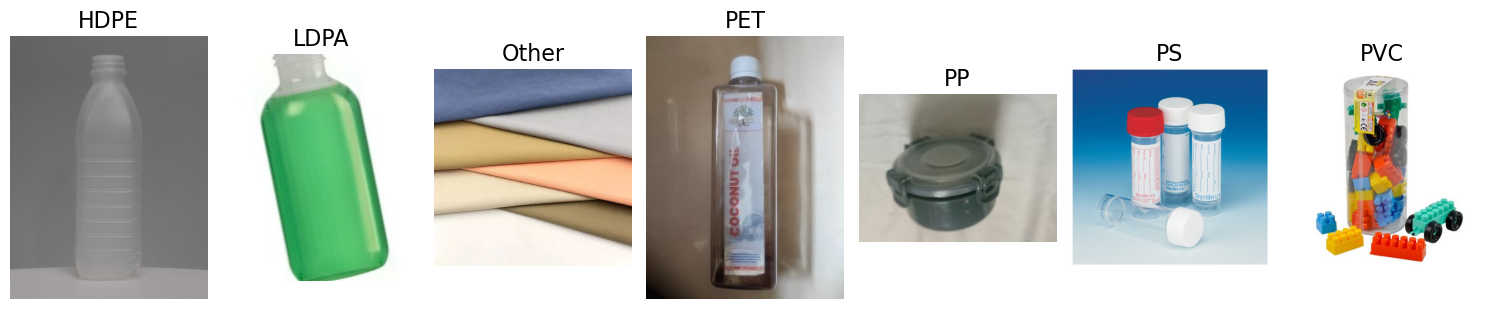

In [55]:
# Caminho das subpastas (cada uma é uma classe)
base_dir = '../data/Plastic_Classification/test/'
classes = os.listdir(base_dir)

# Mostrar 1 imagem aleatória por classe
plt.figure(figsize=(15, 6))

for i, plastic_class in enumerate(classes):
    class_path = os.path.join(base_dir, plastic_class)
    img_file = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, img_file)

    img = mpimg.imread(img_path)
    plt.subplot(1, 7, i+1)
    plt.imshow(img)
    plt.title(plastic_class)
    plt.axis('off')

plt.tight_layout()
plt.show()

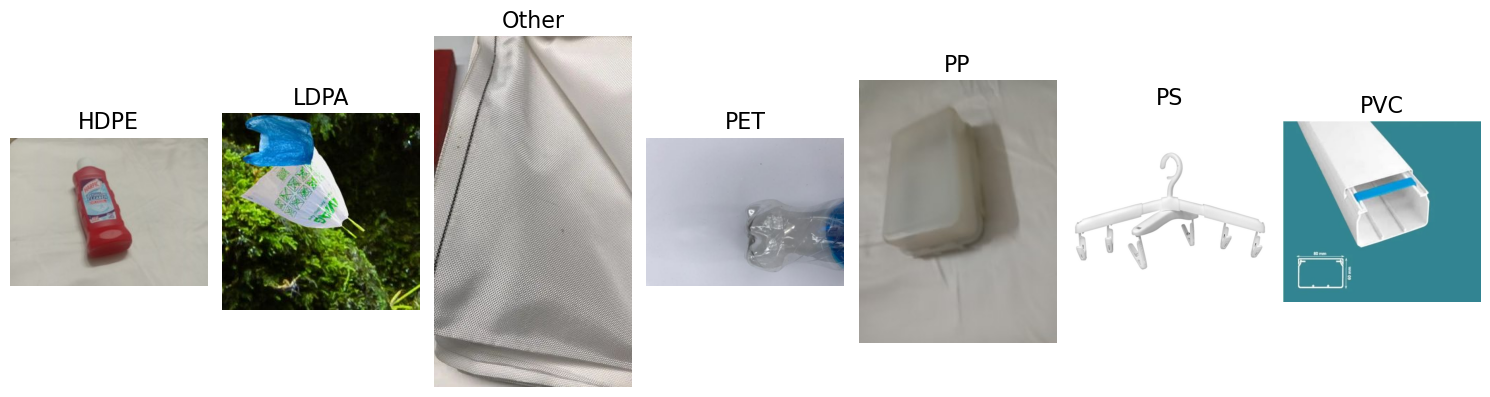

In [56]:
# Caminho das subpastas (cada uma é uma classe)
base_dir = '../data/Plastic_Classification/train/'
classes = os.listdir(base_dir)

# Mostrar 1 imagem aleatória por classe
plt.figure(figsize=(15, 6))

for i, plastic_class in enumerate(classes):
    class_path = os.path.join(base_dir, plastic_class)
    img_file = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, img_file)

    img = mpimg.imread(img_path)
    plt.subplot(1, 7, i+1)
    plt.imshow(img)
    plt.title(plastic_class)
    plt.axis('off')

plt.tight_layout()
plt.show()

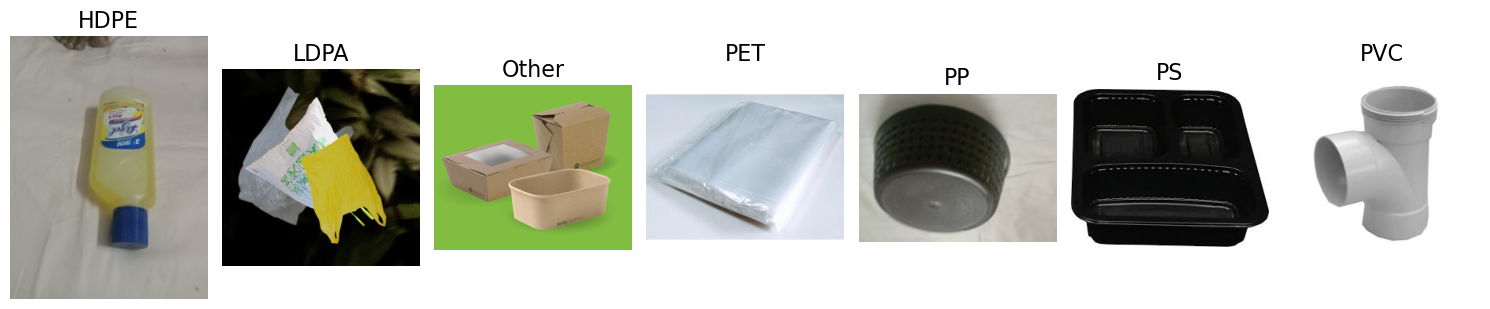

In [58]:
# Caminho das subpastas (cada uma é uma classe)
base_dir = '../data/Plastic_Classification/validation/'
classes = os.listdir(base_dir)

# Mostrar 1 imagem aleatória por classe
plt.figure(figsize=(15, 6))

for i, plastic_class in enumerate(classes):
    class_path = os.path.join(base_dir, plastic_class)
    img_file = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, img_file)

    img = mpimg.imread(img_path)
    plt.subplot(1, 7, i+1)
    plt.imshow(img)
    plt.title(plastic_class)
    plt.axis('off')

plt.tight_layout()
plt.show()